In [63]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns

import requests
import math

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  

In [2]:
storm_19 = pd.read_csv("./data/StormEvents_details-ftp_v1.0_d2019_c20200317.csv")
storm_18 = pd.read_csv("./data/StormEvents_details-ftp_v1.0_d2018_c20200317.csv")
storm_17 = pd.read_csv("./data/StormEvents_details-ftp_v1.0_d2017_c20200121.csv")
storm_16 = pd.read_csv("./data/StormEvents_details-ftp_v1.0_d2016_c20190817.csv")
storm_15 = pd.read_csv("./data/StormEvents_details-ftp_v1.0_d2015_c20191116.csv")

In [3]:
storms = storm_19.append(storm_18).append(storm_17).append(storm_16).append(storm_15)

In [4]:
storms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300829 entries, 0 to 57787
Data columns (total 51 columns):
BEGIN_YEARMONTH       300829 non-null int64
BEGIN_DAY             300829 non-null int64
BEGIN_TIME            300829 non-null int64
END_YEARMONTH         300829 non-null int64
END_DAY               300829 non-null int64
END_TIME              300829 non-null int64
EPISODE_ID            300829 non-null int64
EVENT_ID              300829 non-null int64
STATE                 300829 non-null object
STATE_FIPS            300829 non-null int64
YEAR                  300829 non-null int64
MONTH_NAME            300829 non-null object
EVENT_TYPE            300829 non-null object
CZ_TYPE               300829 non-null object
CZ_FIPS               300829 non-null int64
CZ_NAME               300829 non-null object
WFO                   300829 non-null object
BEGIN_DATE_TIME       300829 non-null object
CZ_TIMEZONE           300829 non-null object
END_DATE_TIME         300829 non-null object
I

In [5]:
storms['BEGIN_DATE_TIME'] = pd.to_datetime(storms['BEGIN_DATE_TIME'])
storms['END_DATE_TIME'] = pd.to_datetime(storms['END_DATE_TIME'])

In [6]:
# df.Val = (df.Val.replace(r'[KM]+$', '', regex=True).astype(float) * \ df.Val.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

In [7]:
storms = storms.drop(['EPISODE_ID','BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'CZ_FIPS', 'CZ_TIMEZONE', 'SOURCE', 'CATEGORY', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'BEGIN_AZIMUTH', 'END_AZIMUTH', 'BEGIN_RANGE', 'END_RANGE', 'DATA_SOURCE'], axis = 1)

In [8]:
storms.head()

,EVENT_ID,STATE,EVENT_TYPE,CZ_TYPE,CZ_NAME,WFO,BEGIN_DATE_TIME,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,...,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_LOCATION,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,824116,TEXAS,Flash Flood,C,BEXAR,EWX,2019-05-09 15:54:00,2019-05-09 18:30:00,0,0,...,NaN,NaN,NaN,NaN,LEON SPGS,SAN GERONIMO,29.7898,-98.6406,29.7158,-98.7744
1,843354,MINNESOTA,Thunderstorm Wind,C,PINE,DLH,2019-07-15 16:40:00,2019-07-15 16:41:00,0,0,...,NaN,NaN,NaN,NaN,ROCK CREEK,ROCK CREEK,45.7700,-92.8700,45.7700,-92.8700
2,861581,TEXAS,Thunderstorm Wind,C,VAN ZANDT,FWD,2019-10-20 22:23:00,2019-10-20 22:23:00,0,0,...,NaN,NaN,NaN,NaN,EDGEWOOD,EDGEWOOD,32.7100,-95.8800,32.7100,-95.8800
3,861584,TEXAS,Thunderstorm Wind,C,TARRANT,FWD,2019-10-20 23:12:00,2019-10-20 23:12:00,0,0,...,NaN,NaN,NaN,NaN,AZLE,AZLE,32.8700,-97.6100,32.8700,-97.6100
4,861582,TEXAS,Thunderstorm Wind,C,PALO PINTO,FWD,2019-10-20 22:36:00,2019-10-20 22:36:00,0,0,...,NaN,NaN,NaN,NaN,MINERAL WELLS,MINERAL WELLS,32.8000,-98.1000,32.8000,-98.1000


In [9]:
storms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300829 entries, 0 to 57787
Data columns (total 30 columns):
EVENT_ID              300829 non-null int64
STATE                 300829 non-null object
EVENT_TYPE            300829 non-null object
CZ_TYPE               300829 non-null object
CZ_NAME               300829 non-null object
WFO                   300829 non-null object
BEGIN_DATE_TIME       300829 non-null datetime64[ns]
END_DATE_TIME         300829 non-null datetime64[ns]
INJURIES_DIRECT       300829 non-null int64
INJURIES_INDIRECT     300829 non-null int64
DEATHS_DIRECT         300829 non-null int64
DEATHS_INDIRECT       300829 non-null int64
DAMAGE_PROPERTY       243009 non-null object
DAMAGE_CROPS          243800 non-null object
MAGNITUDE             157847 non-null float64
MAGNITUDE_TYPE        111630 non-null object
FLOOD_CAUSE           37903 non-null object
TOR_F_SCALE           7023 non-null object
TOR_LENGTH            7023 non-null float64
TOR_WIDTH             7023 

In [10]:
storms[storms['DAMAGE_PROPERTY'].isnull()].EVENT_TYPE.unique()

array(['Winter Weather', 'Drought', 'Winter Storm', 'Thunderstorm Wind',
       'Tornado', 'Hail', 'Marine Thunderstorm Wind', 'Heavy Rain',
       'High Wind', 'Marine Hail', 'Strong Wind', 'Cold/Wind Chill',
       'Extreme Cold/Wind Chill', 'Dense Fog', 'Heavy Snow',
       'Funnel Cloud', 'Frost/Freeze', 'Blizzard', 'Ice Storm',
       'Coastal Flood', 'Waterspout', 'Avalanche', 'Rip Current',
       'Lightning', 'Excessive Heat', 'Heat', 'Dust Devil', 'Wildfire',
       'Tropical Storm', 'Storm Surge/Tide', 'Tropical Depression',
       'Astronomical Low Tide', 'Lakeshore Flood', 'High Surf',
       'Marine High Wind', 'Lake-Effect Snow', 'Marine Strong Wind',
       'Dust Storm', 'Hurricane', 'Marine Tropical Storm', 'Sleet',
       'Freezing Fog', 'Marine Hurricane/Typhoon',
       'Marine Tropical Depression', 'Hurricane (Typhoon)',
       'Marine Dense Fog', 'Seiche'], dtype=object)

In [11]:
# Removing rows where both Damage Property and Damange Crop are not present.

storms = storms[(~storms['DAMAGE_PROPERTY'].isnull()) & (~storms['DAMAGE_CROPS'].isnull())]


In [12]:
storms.DAMAGE_PROPERTY = (storms.DAMAGE_PROPERTY.replace(r'[KMB]+$', '', regex=True).astype(float) * storms.DAMAGE_PROPERTY.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M','B'], [10**3, 10**6, 10**9]).astype(int)).astype(int)

In [13]:
storms.DAMAGE_CROPS = (storms.DAMAGE_CROPS.replace(r'[KMB]+$', '', regex=True).astype(float) * storms.DAMAGE_CROPS.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M','B'], [10**3, 10**6, 10**9]).astype(int)).astype(int)

In [14]:
storms["TOTAL_DAMAGE"] = storms["DAMAGE_PROPERTY"] + storms["DAMAGE_CROPS"]
storms["TOTAL_DEATHS"] = storms["DEATHS_DIRECT"] + storms["DEATHS_INDIRECT"]
storms["TOTAL_INJURIES"] = storms["INJURIES_DIRECT"] + storms["INJURIES_INDIRECT"]

In [15]:
storms = storms.drop(["DAMAGE_PROPERTY","DAMAGE_CROPS"], axis = 1)
storms = storms.drop(["DEATHS_DIRECT","DEATHS_INDIRECT"], axis = 1)
storms = storms.drop(["INJURIES_DIRECT","INJURIES_INDIRECT"], axis = 1)

In [16]:
# pd.DataFrame(storms[storms.END_LAT.isnull()].CZ_NAME.unique())

In [17]:
# for lat, lon in zip(storms.END_LAT.iloc[:], storms.END_LON.iloc[:]):
#     if(math.isnan(lat) and math.isnan(lon)):
#         print("")
#     else:
#         response = requests.get("https://geo.fcc.gov/api/census/area?lat="+str(lat)+"&lon="+str(lon)+"&format=json")
#         print(response.json()['results'][0]['county_name'])

In [18]:
storms["CATEGORIES"] = storms["EVENT_TYPE"]

#Categorizing Hurricanes
storms.loc[(storms.CATEGORIES == "Hurricane") | 
           (storms.CATEGORIES == "Marine Hurricane/Typhoon") | 
           (storms.CATEGORIES == "Hurricane (Typhoon)") | 
           (storms.CATEGORIES == "Tropical Storm") | 
           (storms.CATEGORIES == "Marine Tropical Storm") | 
           (storms.CATEGORIES == "Tropical Depression") | 
           (storms.CATEGORIES == "Marine Tropical Depression"), "CATEGORIES"] = "Hurricane"

#Categorizing Tornados
storms.loc[(storms.CATEGORIES == "Tornado") | 
           (storms.CATEGORIES == "Waterspout") | 
           (storms.CATEGORIES == "Funnel Cloud"), "CATEGORIES"] = "Tornado"

#Categorizing Windstorms
storms.loc[(storms.CATEGORIES == "Strong Wind") | 
           (storms.CATEGORIES == "High Wind") | 
           (storms.CATEGORIES == "Marine High Wind") | 
           (storms.CATEGORIES == "Marine Strong Wind"), "CATEGORIES"] = "Windstorm"

#Categorizing Floods
storms.loc[(storms.CATEGORIES == "Flash Flood") | 
           (storms.CATEGORIES == "Flood") | 
           (storms.CATEGORIES == "Coastal Flood") | 
           (storms.CATEGORIES == "Lakeshore Flood"), "CATEGORIES"] = "Flood"

#Categorizing High Waves
storms.loc[(storms.CATEGORIES == "Tsunami") | 
           (storms.CATEGORIES == "Rip Current") | 
           (storms.CATEGORIES == "High Surf") | 
           (storms.CATEGORIES == "Sneakerwave") | 
           (storms.CATEGORIES == "Seiche"), "CATEGORIES"] = "High Waves"

#Categorizing Tides
storms.loc[(storms.CATEGORIES == "Astronomical Low Tide") | 
           (storms.CATEGORIES == "Storm Surge/Tide"), "CATEGORIES"] = "Tides"

#Categorizing Snow/Hail
storms.loc[(storms.CATEGORIES == "Heavy Snow") | 
           (storms.CATEGORIES == "Ice Storm") | 
           (storms.CATEGORIES == "Winter Weather") | 
           (storms.CATEGORIES == "Winter Storm") | 
           (storms.CATEGORIES == "Blizzard") | 
           (storms.CATEGORIES == "Frost/Freeze") | 
           (storms.CATEGORIES == "Avalanche") | 
           (storms.CATEGORIES == "Marine Hail") | 
           (storms.CATEGORIES == "Hail") | 
           (storms.CATEGORIES == "Sleet") | 
           (storms.CATEGORIES == "Cold/Wind Chill") | 
           (storms.CATEGORIES == "Extreme Cold/Wind Chill") | 
           (storms.CATEGORIES == "Lake-Effect Snow"), "CATEGORIES"] = "Snow/Hail"

#Categorizing Thunder/Rainstorm
storms.loc[(storms.CATEGORIES == "Marine Thunderstorm Wind") | 
           (storms.CATEGORIES == "Heavy Rain") | 
           (storms.CATEGORIES == "Thunderstorm Wind") | 
           (storms.CATEGORIES == "Lightning"), "CATEGORIES"] = "Thunder/Rainstorm"

#Categorizing Fog/Smog
storms.loc[(storms.CATEGORIES == "Dense Fog") | 
           (storms.CATEGORIES == "Marine Dense Fog") | 
           (storms.CATEGORIES == "Freezing Fog") | 
           (storms.CATEGORIES == "Dense Smoke"), "CATEGORIES"] = "Fog/Smog"

#Categorizing Heat
storms.loc[(storms.CATEGORIES == "Excessive Heat") | 
           (storms.CATEGORIES == "Heat"), "CATEGORIES"] = "Heat"

#Categorizing Dust Storms
storms.loc[(storms.CATEGORIES == "Dust Devil") | 
           (storms.CATEGORIES == "Dust Storm"), "CATEGORIES"] = "Dust Storms"

In [19]:
storms.to_csv('storms_clean_data.csv', index=False)

In [87]:
storms = pd.read_csv("./storms_clean_data.csv")

In [88]:
storms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236813 entries, 0 to 236812
Data columns (total 28 columns):
EVENT_ID              236813 non-null int64
STATE                 236813 non-null object
EVENT_TYPE            236813 non-null object
CZ_TYPE               236813 non-null object
CZ_NAME               236813 non-null object
WFO                   236813 non-null object
BEGIN_DATE_TIME       236813 non-null object
END_DATE_TIME         236813 non-null object
MAGNITUDE             117776 non-null float64
MAGNITUDE_TYPE        84756 non-null object
FLOOD_CAUSE           37903 non-null object
TOR_F_SCALE           5573 non-null object
TOR_LENGTH            5573 non-null float64
TOR_WIDTH             5573 non-null float64
TOR_OTHER_WFO         657 non-null object
TOR_OTHER_CZ_STATE    657 non-null object
TOR_OTHER_CZ_FIPS     657 non-null float64
TOR_OTHER_CZ_NAME     657 non-null object
BEGIN_LOCATION        154185 non-null object
END_LOCATION          154185 non-null object
BEGIN_

In [66]:
storms.describe()

,EVENT_ID,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,TOTAL_DAMAGE,TOTAL_DEATHS,TOTAL_INJURIES
count,236813.000000,117776.000000,5573.000000,5573.000000,657.000000,154185.000000,154185.000000,154185.000000,154185.000000,2.368130e+05,236813.000000,236813.000000
mean,708841.896779,37.239746,2.815494,197.962997,106.680365,37.544559,-91.195267,37.541403,-91.187886,2.684696e+05,0.013800,0.034390
std,91632.663071,23.560855,3.738495,316.697538,90.675034,5.197567,11.690682,5.199661,11.687136,1.848776e+07,0.294228,1.829107
min,546733.000000,0.250000,0.010000,1.000000,1.000000,-14.362900,-171.032700,-14.437500,-170.905900,-2.147484e+09,0.000000,0.000000
25%,628312.000000,1.750000,0.410000,50.000000,45.000000,34.310000,-97.310000,34.310000,-97.300000,0.000000e+00,0.000000,0.000000
50%,708352.000000,50.000000,1.460000,80.000000,95.000000,37.870000,-90.953000,37.868600,-90.930700,0.000000e+00,0.000000,0.000000
75%,788402.000000,52.000000,3.800000,200.000000,143.000000,41.260000,-82.760000,41.256000,-82.751900,2.000000e+02,0.000000,0.000000
max,871547.000000,140.000000,41.880000,5280.000000,810.000000,70.126900,-64.715100,70.200500,-64.715100,2.000100e+09,86.000000,500.000000


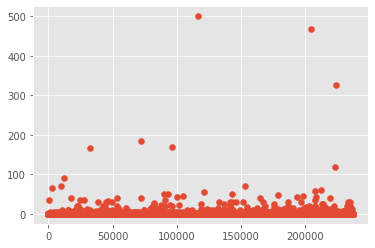

In [89]:
x = storms.TOTAL_INJURIES.index.values
plt.scatter(x, storms.TOTAL_INJURIES)

In [91]:
storms = storms[storms.TOTAL_INJURIES <= 200]

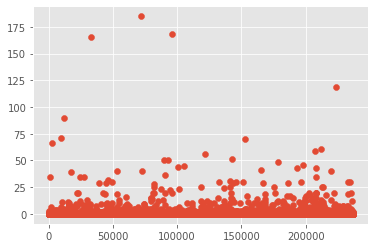

In [92]:
x = storms.TOTAL_INJURIES.index.values
plt.scatter(x, storms.TOTAL_INJURIES)

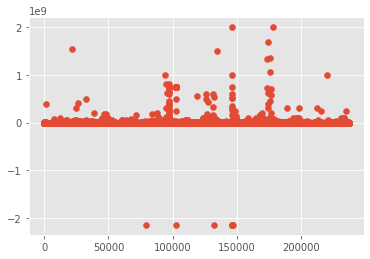

In [69]:
x = storms.TOTAL_DAMAGE.index.values
plt.scatter(x, storms.TOTAL_DAMAGE)

In [93]:
storms = storms[storms.TOTAL_DAMAGE >= 0]

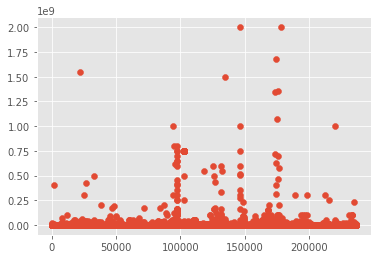

In [94]:
x = storms.TOTAL_DAMAGE.index.values
plt.scatter(x, storms.TOTAL_DAMAGE)

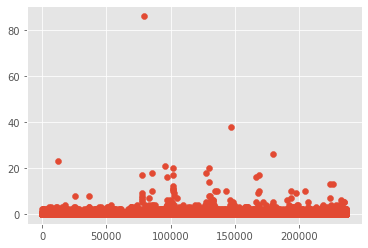

In [70]:
x = storms.TOTAL_DEATHS.index.values
plt.scatter(x, storms.TOTAL_DEATHS)

In [95]:
storms = storms[storms.TOTAL_DEATHS <= 30]

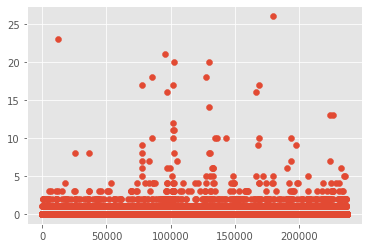

In [96]:
x = storms.TOTAL_DEATHS.index.values
plt.scatter(x, storms.TOTAL_DEATHS)

In [97]:
storms1 = storms.iloc[:,24:27]

In [98]:
storms1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236803 entries, 0 to 236812
Data columns (total 3 columns):
TOTAL_DAMAGE      236803 non-null int64
TOTAL_DEATHS      236803 non-null int64
TOTAL_INJURIES    236803 non-null int64
dtypes: int64(3)
memory usage: 7.2 MB


Text(0.5, 1, 'Correlation matrix')

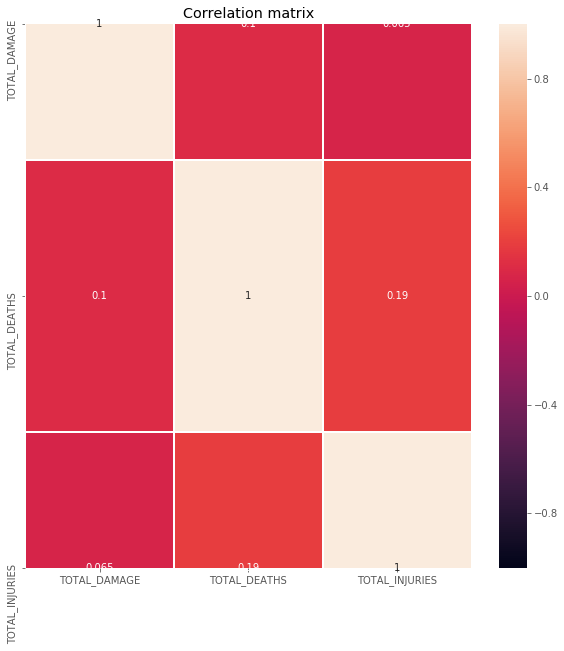

In [99]:
cmat = storms1.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(cmat, vmin=-1, vmax=1, annot=True, linewidths = 1)

plt.title("Correlation matrix")